# Cardiovascular Disease Analysis - Task 1: Problem Definition and Dataset Exploration


---
## 1. Environment Setup


### Q1: Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2. Problem Statement


### Q2: Define the Problem Statement
Write down the problem statement for the Cardiovascular Disease prediction project


In [29]:
# Problem Statement:
# Build a machine learning model to accurately predict whether a patient is at risk of developing cardiovascular disease (cardio=1)
# based on their clinical and lifestyle features, facilitating early detection and intervention.
#
# Key Aspects:
# 1. Build a predictive classification model.
# 2. Identify key risk factors.
# 3. Enable early diagnosis and preventive treatment.

### Q3: Identify Objective
What is the main objective of this machine learning project?


In [31]:
# Objective:
# The main objective is to develop a robust and accurate classification model that can predict the presence of cardiovascular disease.
# The success of the model will be measured by its ability to reliably identify high-risk individuals.

---
## 3. Data Loading


### Q4: Load the Dataset


In [5]:
df = pd.read_csv('cardio_train.csv', sep=';')

### Q5: Display First 5 Rows


In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Q6: Display Last 5 Rows


In [9]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


---
## 4. Dataset Structure Overview


### Q7: Print Dataset Shape


In [11]:
rows, cols = df.shape
print(f'Number of Rows: {rows}')
print(f'Number of Columns: {cols}')
print(f'\nTotal Data Points: {rows * cols}')

Number of Rows: 70000
Number of Columns: 13

Total Data Points: 910000


### Q8: List All Column Names


In [13]:
print(df.columns.tolist())

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


### Q9: Check Data Types


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


---
## 5. Exploratory Data Analysis (EDA)


### Q10: Generate Statistical Summary


In [17]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Q11: Check for Missing Values


In [19]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [21]:
df.duplicated().sum()

0

### Q12: Analyze Target Variable Distribution
Analyze the distribution of the target variable (cardio)


In [25]:
# 0 → No cardiovascular disease
# 1 → Has cardiovascular disease
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

---
## 6. Feature Understanding


### Q13: Identify Categorical vs Numerical Features


In [33]:
# Numerical: age (in days), height, weight, ap_hi, ap_lo
# Ordinal Categorical: cholesterol, gluc
# Binary Categorical: gender, smoke, alco, active, cardio
# Identifier: id

### Q14: Analyze Unique Values in Each Column


In [27]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

### Q15: Identify Potential Outliers (Age Range)


In [35]:
# Convert age from days to years (age_years)
df['age_years'] = np.floor(df['age'] / 365.25).astype(int)

print("Age in Years Range:")
print(f"Min Age: {df['age_years'].min()}")
print(f"Max Age: {df['age_years'].max()}")

Age in Years Range:
Min Age: 29
Max Age: 64


---
## 7. Data Quality Checks


### Q16: Check for Duplicate Rows


In [37]:
# Check for duplicates excluding the unique 'id' column
duplicate_count = df.drop('id', axis=1).duplicated().sum()
print(f"Number of duplicate rows (excluding 'id'): {duplicate_count}")

Number of duplicate rows (excluding 'id'): 24


### Q17: Check for Negative or Invalid Values


In [39]:
print("Count of non-positive ap_hi:", (df['ap_hi'] <= 0).sum())
print("Count of non-positive ap_lo:", (df['ap_lo'] <= 0).sum())

print("\nMinimum values found:")
print("Min Weight:", df['weight'].min())
print("Min ap_hi:", df['ap_hi'].min())
print("Min ap_lo:", df['ap_lo'].min())

Count of non-positive ap_hi: 7
Count of non-positive ap_lo: 22

Minimum values found:
Min Weight: 10.0
Min ap_hi: -150
Min ap_lo: -70


### Q18: Identify Feature Ranges and Bounds


In [41]:
# Check for physiologically invalid blood pressure records
ap_invalid_count = df[
    (df['ap_hi'] < 50) | (df['ap_hi'] > 250) |
    (df['ap_lo'] < 40) | (df['ap_lo'] > 150) |
    (df['ap_lo'] >= df['ap_hi'])
].shape[0]

print(f"Number of rows with potentially invalid blood pressure values (based on broad medical ranges or ap_lo > ap_hi): {ap_invalid_count}")
print("\nObserved Ranges:")
print(f"ap_hi range: {df['ap_hi'].min()} to {df['ap_hi'].max()}")
print(f"ap_lo range: {df['ap_lo'].min()} to {df['ap_lo'].max()}")

Number of rows with potentially invalid blood pressure values (based on broad medical ranges or ap_lo > ap_hi): 1333

Observed Ranges:
ap_hi range: -150 to 16020
ap_lo range: -70 to 11000


---
## 8. Data Visualization


### Q19: Plot Target Variable Distribution


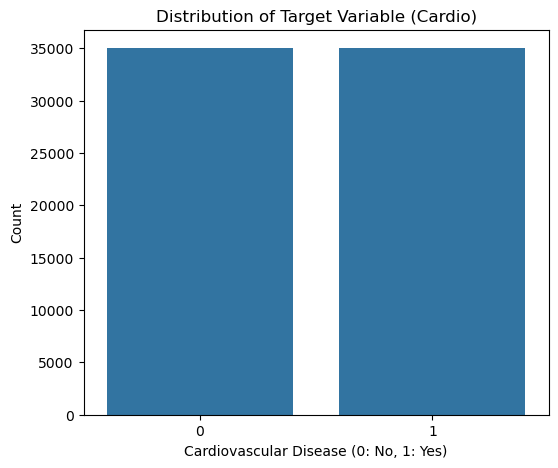

In [43]:
plt.figure(figsize=(6, 5))
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Target Variable (Cardio)')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

### Q20: Visualize Age Distribution


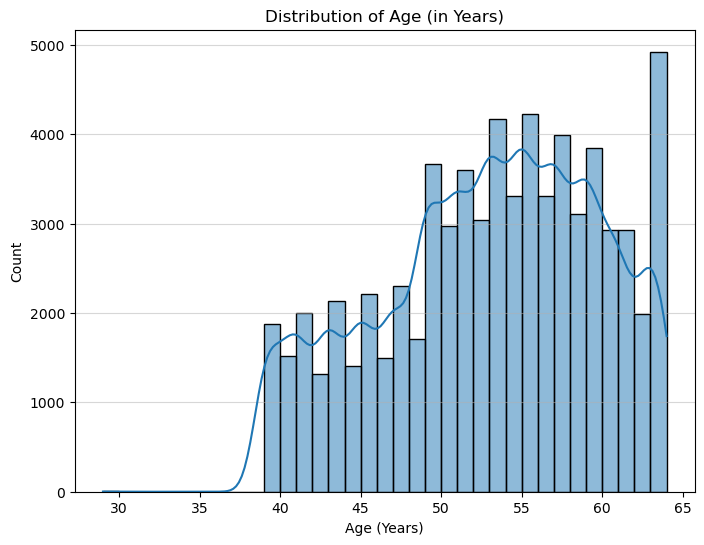

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age_years'], bins=df['age_years'].max() - df['age_years'].min(), kde=True)
plt.title('Distribution of Age (in Years)')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.5)
plt.show()

### Q21: Plot Gender vs Cardiovascular Disease


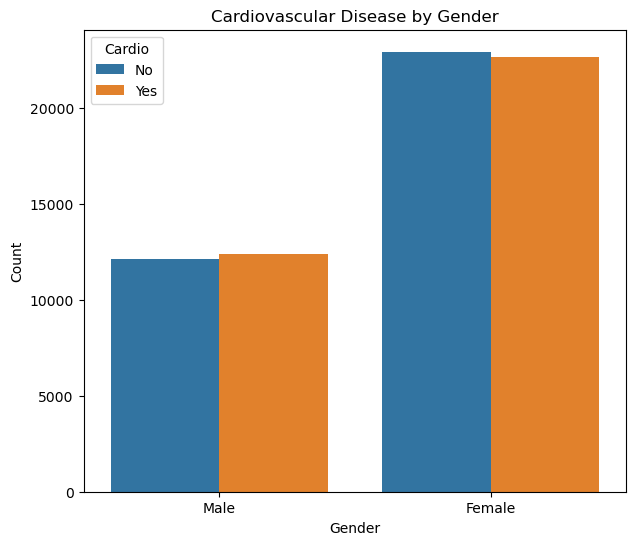

In [47]:
# (1: Female, 2: Male)
df['gender_label'] = df['gender'].map({1: 'Female', 2: 'Male'})

plt.figure(figsize=(7, 6))
sns.countplot(x='gender_label', hue='cardio', data=df)
plt.title('Cardiovascular Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Cardio', labels=['No', 'Yes'])
plt.show()

### Q22: Visualize Cholesterol Levels by Target Variable


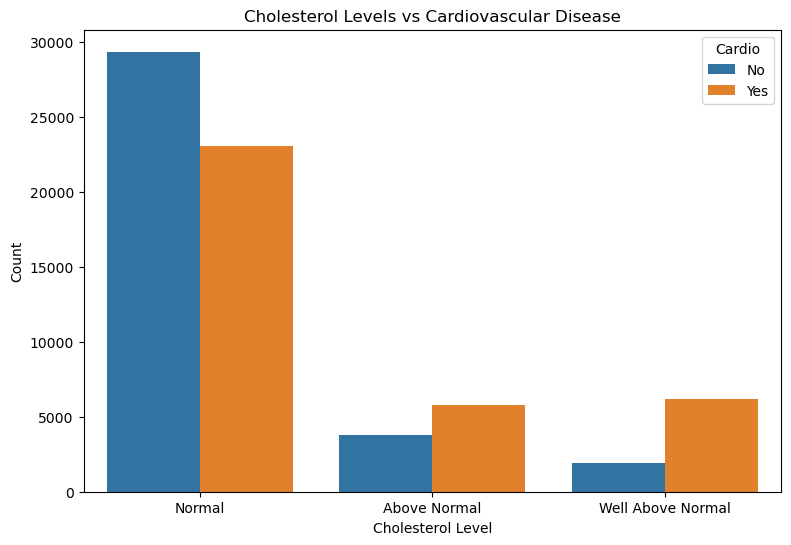

In [49]:
# 1: normal, 2: above normal, 3: well above normal
df['cholesterol_label'] = df['cholesterol'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})

plt.figure(figsize=(9, 6))
sns.countplot(x='cholesterol_label', hue='cardio', data=df, order=['Normal', 'Above Normal', 'Well Above Normal'])
plt.title('Cholesterol Levels vs Cardiovascular Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.legend(title='Cardio', labels=['No', 'Yes'])
plt.show()

### Q23: Plot Blood Pressure Distribution (ap_hi and ap_lo)


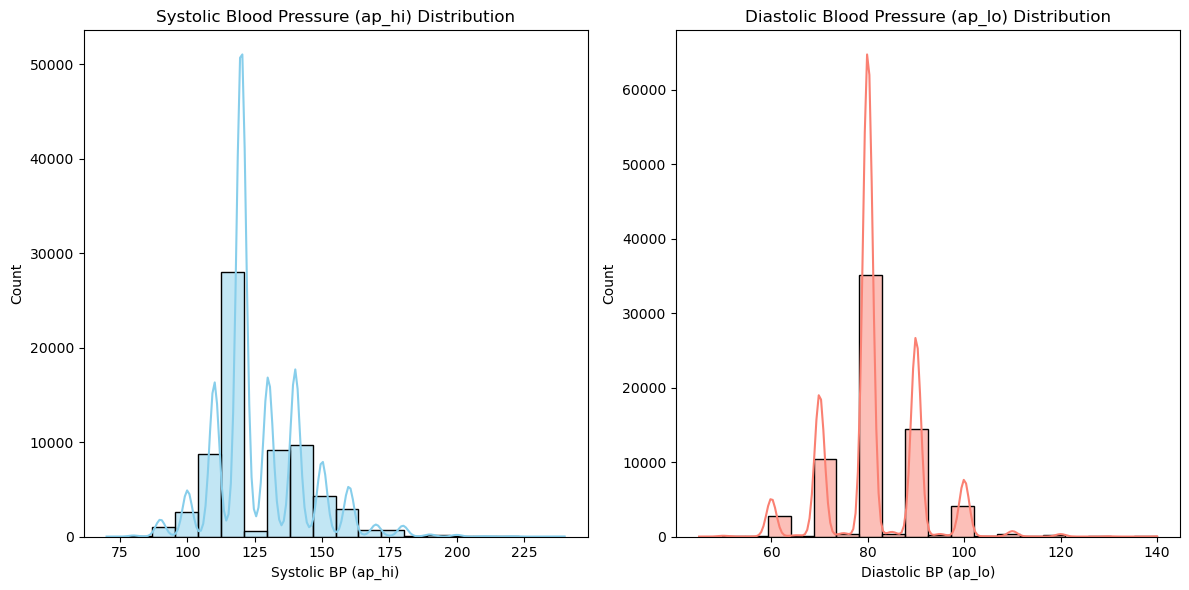

In [51]:
# Filter extreme outliers for a meaningful visualization (e.g., physiological ranges)
bp_filtered = df[(df['ap_hi'] > 50) & (df['ap_hi'] < 250) &
                 (df['ap_lo'] > 40) & (df['ap_lo'] < 150) &
                 (df['ap_lo'] <= df['ap_hi'])].copy()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(bp_filtered['ap_hi'], kde=True, bins=20, color='skyblue')
plt.title('Systolic Blood Pressure (ap_hi) Distribution')
plt.xlabel('Systolic BP (ap_hi)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(bp_filtered['ap_lo'], kde=True, bins=20, color='salmon')
plt.title('Diastolic Blood Pressure (ap_lo) Distribution')
plt.xlabel('Diastolic BP (ap_lo)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Q25: Correlation Matrix

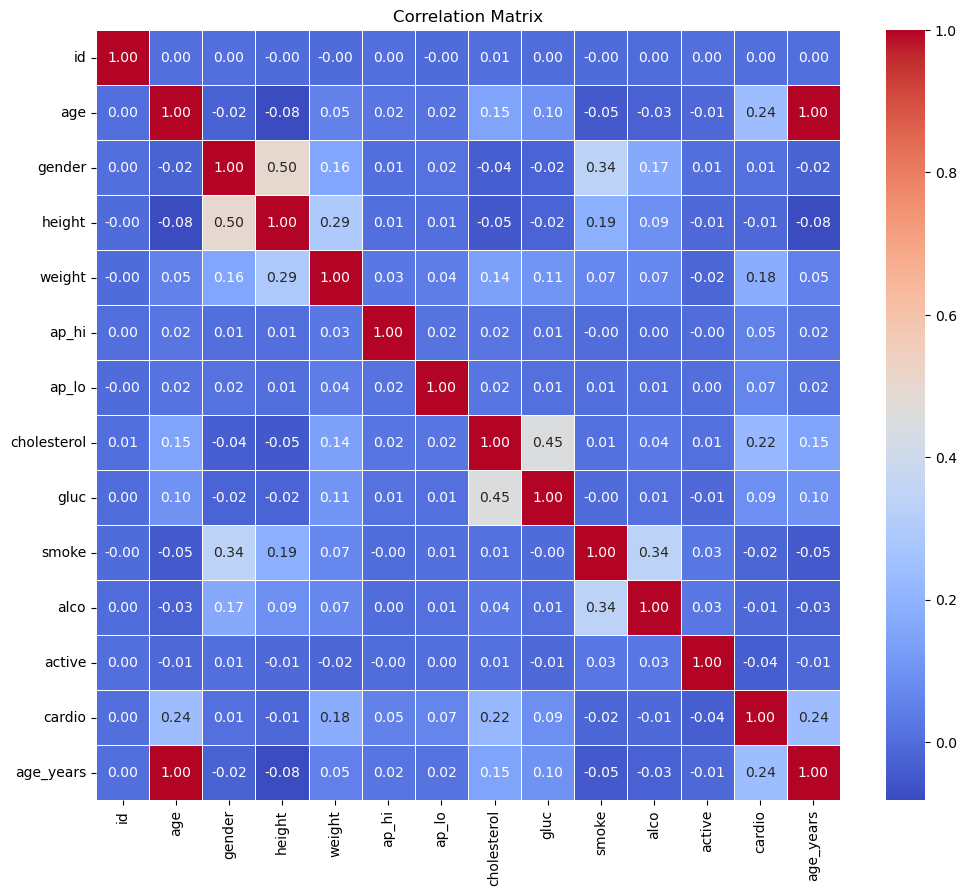

In [61]:
plt.figure(figsize=(12, 10))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

---
## 9. Key Observations and Insights


### Q25: Summarize Key Findings


In [53]:
# Key Findings Summary:
# 1. Data Integrity: No missing values, but critical outliers in 'ap_hi' and 'ap_lo' (e.g., negative, extreme high values).
# 2. Target Distribution: The 'cardio' variable is perfectly balanced (35021 vs 34979).
# 3. Correlation: Cholesterol level shows a very strong, positive relationship with the probability of having CVD.
# 4. Data Preparation: Significant cleaning/feature engineering (like BMI calculation and BP outlier removal) is required before modeling.